In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('amazon.csv',encoding='iso-8859-1')

* Display Top 5 Rows Of Dataset

In [3]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [4]:
data.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

* Check Last 5 Rows Of The Dataset

In [5]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


* Find The Shape Of Our Dataset

In [6]:
data.shape

(6454, 5)

In [7]:
print('number of Rows: ',data.shape[0])
print('Number Of Columns :',data.shape[1])

number of Rows:  6454
Number Of Columns : 5


* Get The Information about our dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


* Check Duplicated Data and drop them

In [9]:
print('Any Duplicated Value ?: ',data.duplicated().any())

Any Duplicated Value ?:  True


In [10]:
data=data.drop_duplicates()

In [11]:
print('Any Duplicated Value ?: ',data.duplicated().any())

Any Duplicated Value ?:  False


In [12]:
data.isnull().any()

year      False
state     False
month     False
number    False
date      False
dtype: bool

<Axes: >

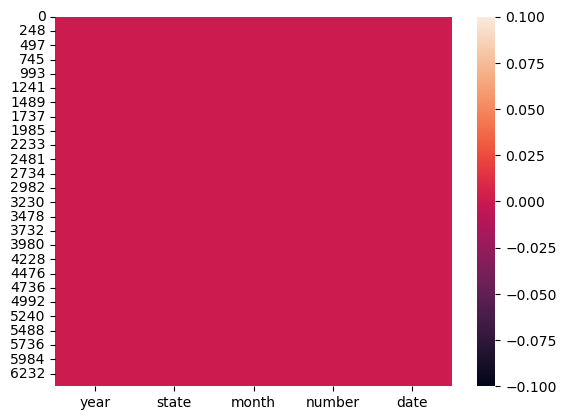

In [13]:
sns.heatmap(data.isnull())

In [14]:
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

* Get Overall Statstics about the Dataset

In [15]:
data.describe(include='all')

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,20
top,NaN,Rio,Agosto,NaN,2015-01-01
freq,NaN,697,540,NaN,324
mean,2007.490969,NaN,NaN,108.815178,NaN
std,5.731806,NaN,NaN,191.142482,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2003.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.497000,NaN
75%,2012.000000,NaN,NaN,114.000000,NaN


* Cleaning Month Data

In [16]:
data['month']

0        Janeiro
1        Janeiro
2        Janeiro
3        Janeiro
4        Janeiro
          ...   
6449    Dezembro
6450    Dezembro
6451    Dezembro
6452    Dezembro
6453    Dezembro
Name: month, Length: 6422, dtype: object

In [17]:
list1=[]

for mon in data['month']:
    if mon not in list1:
        list1.append(mon)

In [18]:
list1

['Janeiro',
 'Fevereiro',
 'Março',
 'Abril',
 'Maio',
 'Junho',
 'Julho',
 'Agosto',
 'Setembro',
 'Outubro',
 'Novembro',
 'Dezembro']

In [19]:
data['New_Month']=data['month'].map(
    {
        'Janeiro':'jan',
        'Fevereiro':'feb',
        'Março':'march',
        'Abril':'april',
        'Maio':'may',
        'Junho':'june',
        'Julho':'jully',
        'Agosto':'august',
        'Setembro':'sep',
        'Outubro':'oct',
        'Novembro':'nov',
        'Dezembro':'dec'
 
    }
)

In [20]:
data.head()

,year,state,month,number,date,New_Month
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


* Total No. Of Forest Fire registered

In [21]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'New_Month'], dtype='object')

In [22]:
data['number'].count()

6422

* Which months Maximum number of fires were reported?

In [23]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'New_Month'], dtype='object')

In [24]:
data.groupby('New_Month')['number'].sum().sort_values(ascending=False).reset_index().set_index('New_Month').head(1)

,number
New_Month,
jully,92319.113


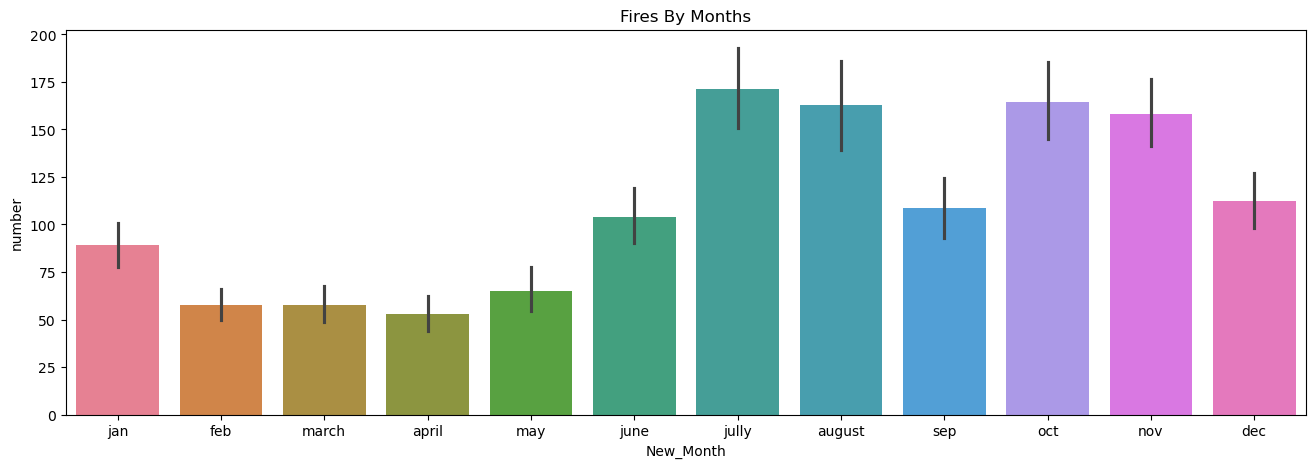

In [25]:
plt.figure(figsize=(16,5))
sns.barplot(x='New_Month',y='number',data=data,hue='New_Month')
plt.title('Fires By Months')
plt.show()

* In Which year Maximum Number of Forest Fire were Reported ?

In [26]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'New_Month'], dtype='object')

In [27]:
data.groupby('year')['number'].sum().sort_values(ascending=False).reset_index().set_index('year').head(1)

,number
year,
2003,42760.674


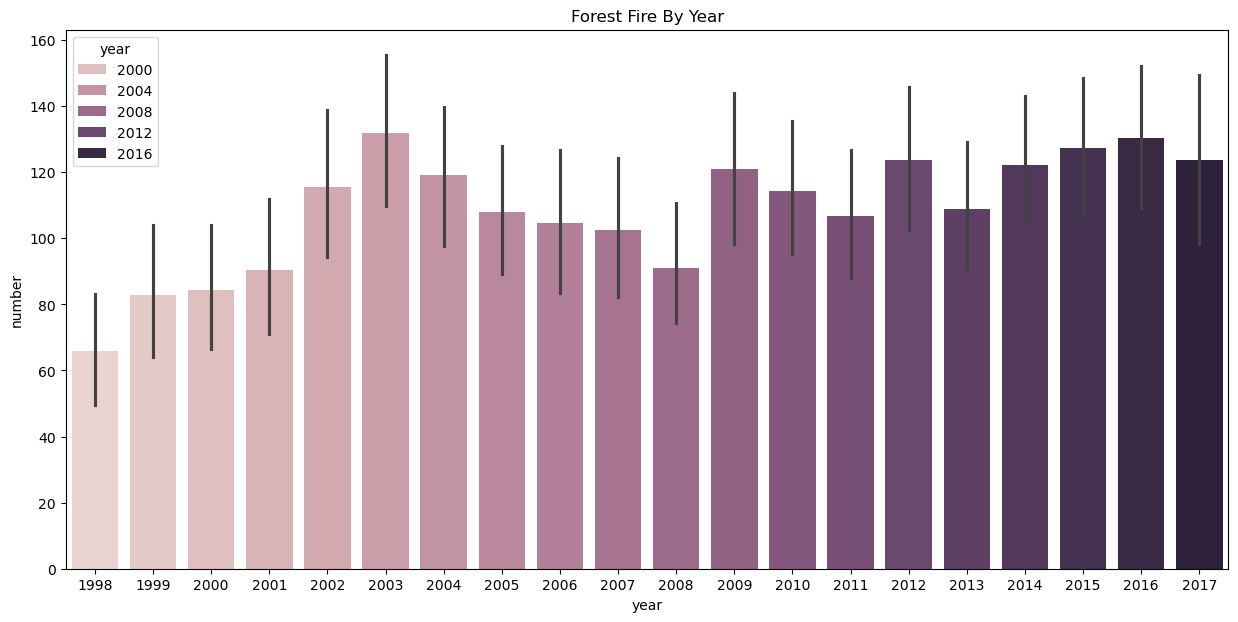

In [28]:
plt.figure(figsize=(15,7))
sns.barplot(x='year',y='number',data=data,hue='year')
plt.title('Forest Fire By Year')
plt.show()

* In Which State Maximum number Of Forest Fire Were Reported ?

In [29]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'New_Month'], dtype='object')

In [30]:
data.groupby('state')['number'].sum().sort_values(ascending=False).reset_index().set_index('state').head(1)

,number
state,
Mato Grosso,96246.028


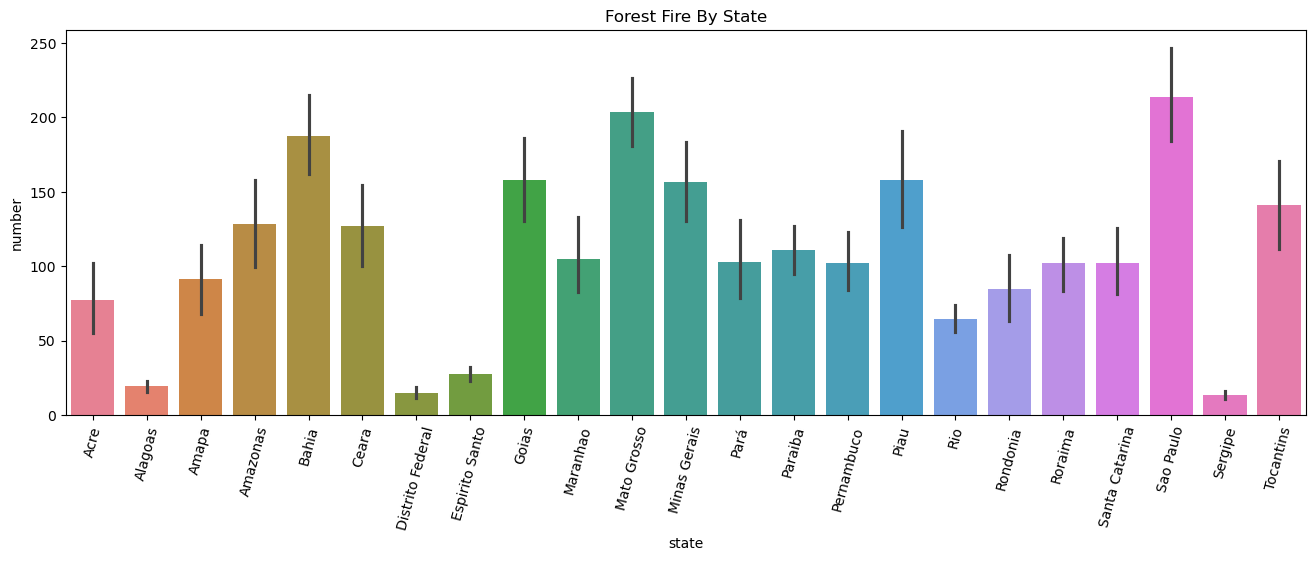

In [31]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=data,hue='state')
plt.xticks(rotation=75)
plt.title('Forest Fire By State')
plt.show()

* Find Total Number of Fires were Reported in Amazonas

In [32]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'New_Month'], dtype='object')

In [33]:
print('Total no Of Fires reported In Amazonas State  is: ',data[data['state']=='Amazonas']['number'].sum())

Total no Of Fires reported In Amazonas State  is:  30650.129


* Display Number of Fires Were Reported in Amazonas (Year-wise)

In [34]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'New_Month'], dtype='object')

In [35]:
data1=data[data['state']=='Amazonas']

In [36]:
data2=data1.groupby('year')['number'].sum().sort_values(ascending=False).reset_index().set_index('year')

In [37]:
data2

,number
year,
2002,2852.000
2008,2717.000
2014,2385.909
2010,2324.508
2004,2298.207
2016,2060.972
2005,1657.128
2011,1652.538
2003,1524.268


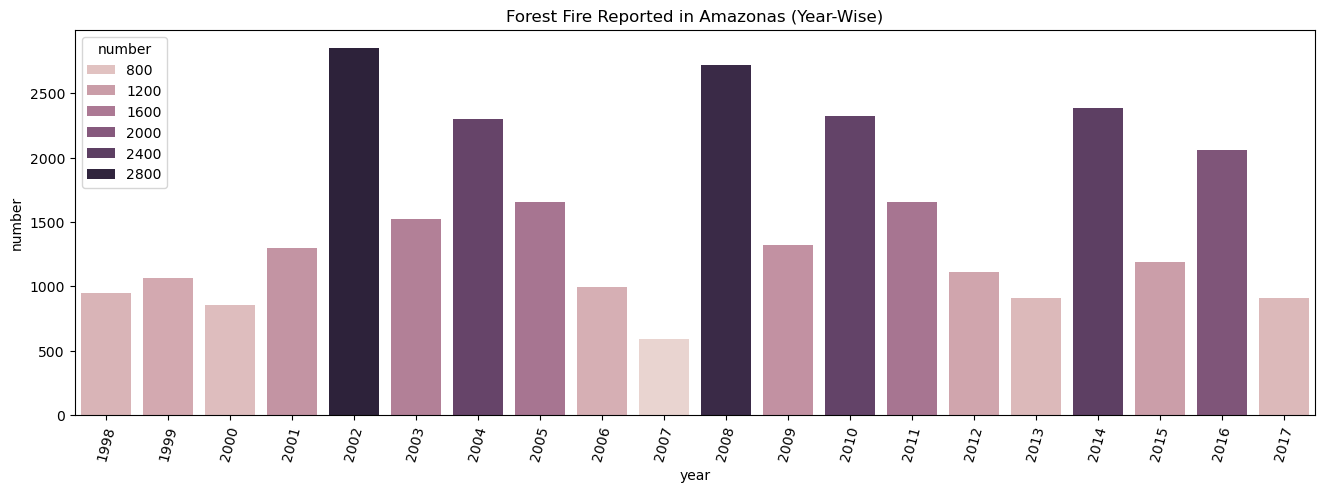

In [38]:
plt.figure(figsize=(16,5))
sns.barplot(x=data2.index,y='number',data=data2,hue='number')
plt.xticks(rotation=75)
plt.title('Forest Fire Reported in Amazonas (Year-Wise)')
plt.show()

* Find the total Number of Fires were Reported in 2015 and visualize data based on each Month

In [39]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'New_Month'], dtype='object')

In [40]:
fire=data[data['year']==2015].groupby('New_Month')['number'].sum().reset_index()

In [41]:
fire

,New_Month,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,jully,4364.392
6,june,3260.552
7,march,2202.000
8,may,2384.000
9,nov,4034.518


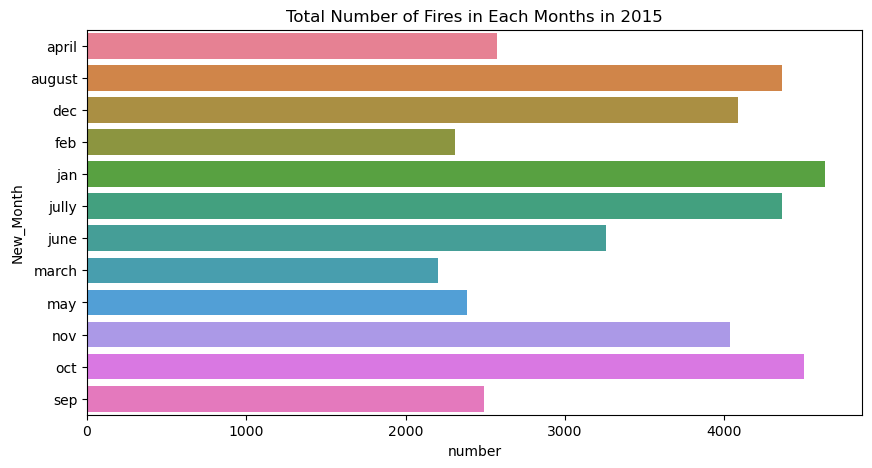

In [68]:
plt.figure(figsize=(10,5))
sns.barplot(x='number',y='New_Month',data=fire,hue='New_Month')
plt.title('Total Number of Fires in Each Months in 2015')
plt.show()


* Find the Avg No of Fires Were Reported From Higest To Lowest (State-Wise)

In [69]:
state_wise=data.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
state_wise

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


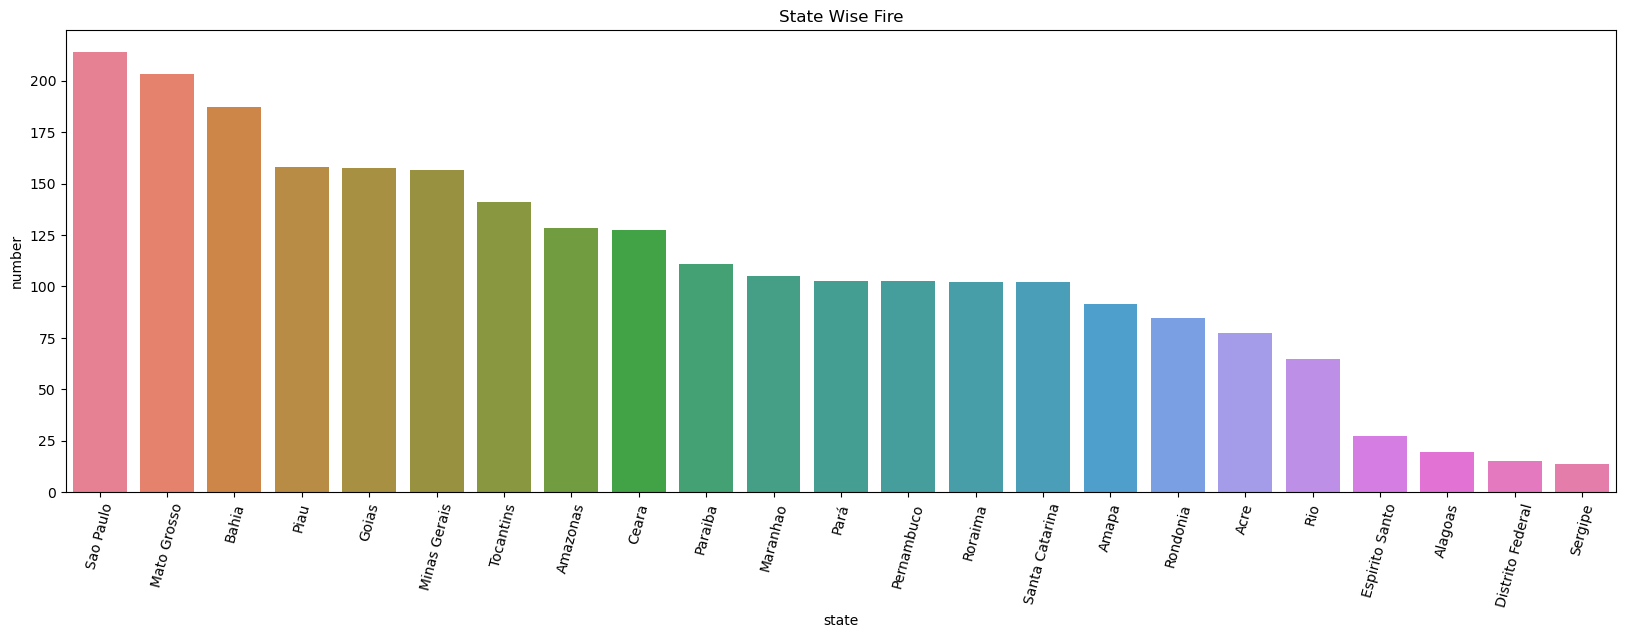

In [72]:
plt.figure(figsize=(20,6))
sns.barplot(x='state',y='number',data=state_wise,hue='state')
plt.xticks(rotation=75)
plt.title('State Wise Fire')
plt.show()

* Find the State Name Where Fires Were Reported in 'dec' Month

In [73]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'New_Month'], dtype='object')

In [82]:
data[data['New_Month']=='dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)